# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [TRI RAMDHANY]
- **Email:** [triramdhany@gmail.com]


## Menentukan Pertanyaan Bisnis

- Kota mana yang memiliki seller dan customer paling banyak?
- Bagiamana kepuasan customer terhadap layanan e-commerce ? 
- Produk Kategori mana saja yang laku dan tidak laku di jual e-commerce  ?
- Metode pembayaran mana yang digunakan untuk jumlah pembayaran terbesar? Berapa besarnya nilai pembayarannya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.ticker as mtick
import numpy as np
import datetime as dt



## Data Wrangling

### Gathering Data

#### Membaca dataset geolocation

In [5]:
geolocation = pd.read_csv('E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP
6,1047,-23.546273,-46.641225,sao paulo,SP
7,1013,-23.546923,-46.634264,sao paulo,SP
8,1029,-23.543769,-46.634278,sao paulo,SP
9,1011,-23.547640,-46.636032,sao paulo,SP


#### Membaca data produk

In [6]:
product = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
product.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [7]:
category = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')
category.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


#### Membaca data customer

In [8]:
customer = pd.read_csv('E-Commerce Public Dataset/customers_dataset.csv')
customer.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


#### Membaca data order

In [9]:
orders = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [10]:
order_items_df = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [11]:
order_payments_df = pd.read_csv('E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments_df.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [12]:
order_reviews_df = pd.read_csv('E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


#### Membaca data seller

In [13]:
sellers = pd.read_csv('E-Commerce Public Dataset/sellers_dataset.csv')
sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


**Insight:**
- dari data geolocation terlihat bahwa kode SP menunjukan retensi data  yang cukup banyak 
- pada data order_dataset dan order_review_dataset ditemukan data kosong

### Assessing Data

#### Assesing data geolocation

In [14]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


#### Assesing data produk

In [16]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Assesing Customer dan seller

In [17]:
customer.info()
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8

#### Asessing data order

In [18]:
orders.info()
order_reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  ob

In [19]:
order_payments_df.info()
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  objec

##### Check missing value

**Insight:**
- Dari hasil assesing data terlihat ada missing value di dataset : product, order dan order_review


In [20]:
product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

##### Check duplicate

In [23]:
datasets = [customer, geolocation, orders, order_items_df, order_payments_df, order_reviews_df, product, sellers]

for dataset in datasets:
    
    print(f'total duplicates: {dataset.duplicated().sum()}\n')

total duplicates: 0

total duplicates: 261831

total duplicates: 0

total duplicates: 0

total duplicates: 0

total duplicates: 0

total duplicates: 0

total duplicates: 0



hanya pada data geolocation di temukan duplikasi data 

### Cleaning Data

In [24]:
#hapus data yang duplikasi pada data geolocation
geolocation.drop_duplicates(inplace=True)
geolocation.duplicated().sum()

np.int64(0)

In [25]:
# Merubah date time dataset yang bertipe data object menjadi date-time data type
orders_col = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
    ]

for col in orders_col:
    orders[col] = pd.to_datetime(orders[col])

orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [26]:
# Merubah date time dataset yang bertipe data object menjadi date-time data type
order_reviews_col = [
    'review_creation_date',
    'review_answer_timestamp'
]

for col in order_reviews_col:
    order_reviews_df[col] = pd.to_datetime(order_reviews_df[col])

order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [27]:
# Merubah date time dataset yang bertipe data object menjadi date-time data type
order_items_col = ['shipping_limit_date']

for col in order_items_col:
    order_items_df[col] = pd.to_datetime(order_items_df[col])
    
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [29]:
# mengganti nilai NAN di review_comment_title review_comment_message diganti dengan no title dan no message 
order_reviews_df['review_comment_title'].fillna('No Title',inplace=True)
order_reviews_df['review_comment_message'].fillna('No Message',inplace=True)
print(order_reviews_df)

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4            

In [30]:
order_reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,No Title,No Message,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,No Title,No Message,2017-07-16,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,No Title,No Message,2018-08-14,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,No Title,No Message,2017-05-17,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47


## Exploratory Data Analysis (EDA)

### Explore data customer 

In [31]:

customer.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [33]:
#check nilai unik pada data customer
customer.customer_id.is_unique

True

### check kota mana customer yang paling dominan

In [34]:
#check kota mana customer yang paling dominan
customer.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

Customer paling banyak di sao paulo

### Explore data order payment

In [35]:

order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


### Cek Jenis Pembayaran yang paling dominan

In [36]:
order_payments_df.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

Credit card jenis pembayaran yang paling banyak

### Mengurutkan berdasarkan pembayaran yang terbesar

In [37]:
order_payments_df.sort_values(by='payment_value', ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66
...,...,...,...,...,...
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00


### EXPLOR SEMUA DATA

Menggabungkan tabel customer dan order

In [38]:
customer_orders_df = pd.merge(
    left=customer,
    right=orders,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
customer_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


Menggabungkan data product dan product category 

In [39]:
product_category_df = pd.merge(
    left=product,
    right=category,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

product_category_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0,musical_instruments
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0,cool_stuff
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0,furniture_decor
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0,home_appliances
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0,toys


In [40]:
#menambahkan kolom baru produk kategori berbahasa inggris
column =product_category_df.pop('product_category_name_english')
product_category_df.insert(2, column.name, column)
product_category_df.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Menggabungkan data customer order dan order payment

In [41]:
merge1 = pd.merge(
    left=customer_orders_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


gabungkan semua data 

In [42]:
merge2 = pd.merge(
    left=merge1,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
merge2.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [43]:
merge3 = pd.merge(
    left=merge2,
    right=product_category_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
merge3.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,21.88,moveis_escritorio,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,46.48,utilidades_domesticas,housewares,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,22.25,casa_conforto,home_confort,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [44]:
merge4 = pd.merge(
    left=merge3,
    right=sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
merge4.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,14940.0,ibitinga,SP


In [45]:
all_df = pd.merge(
    left=merge4,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,8577.0,itaquaquecetuba,SP,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,No Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,88303.0,itajai,SC,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,No Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,No Title,No Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,No Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,14940.0,ibitinga,SP,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [46]:
all_df.describe()

,customer_zip_code_prefix,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_installments,payment_value,order_item_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score,review_creation_date,review_answer_timestamp
count,119143.000000,119143,118966,117057,115722,119143,119140.000000,119140.000000,119140.000000,118310.000000,...,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118146.000000,118146,118146
mean,35033.451298,2017-12-29 18:36:13.115760384,2017-12-30 04:49:18.425726720,2018-01-03 08:24:34.395525376,2018-01-12 20:55:38.199616256,2018-01-22 15:21:10.241642496,1.094737,2.941246,172.735135,1.196543,...,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,4.015582,2018-01-11 13:17:50.103092736,2018-01-14 17:00:35.769302528
min,1003.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,0.000000,0.000000,1.000000,...,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,11250.000000,2017-09-10 20:15:46,2017-09-11 15:50:48.500000,2017-09-14 19:52:12,2017-09-22 21:54:31.249999872,2017-10-02 00:00:00,1.000000,1.000000,60.850000,1.000000,...,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000,2017-09-22 00:00:00,2017-09-25 11:15:40.750000128
50%,24240.000000,2018-01-17 11:59:12,2018-01-17 16:49:49,2018-01-23 17:03:08,2018-02-01 03:17:55,2018-02-14 00:00:00,1.000000,2.000000,108.160000,1.000000,...,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,5.000000,2018-02-01 00:00:00,2018-02-03 12:04:23
75%,58475.000000,2018-05-03 13:18:30,2018-05-03 16:56:53,2018-05-07 14:57:00,2018-05-15 00:08:31.500000,2018-05-25 00:00:00,1.000000,4.000000,189.240000,1.000000,...,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,5.000000,2018-05-15 00:00:00,2018-05-17 10:48:59
max,99990.000000,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,24.000000,13664.080000,21.000000,...,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35
std,29823.198969,NaN,NaN,NaN,NaN,NaN,0.730141,2.777848,267.776077,0.699489,...,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,1.400436,NaN,NaN


### tampilkan total laba berdasarkan negara bagian untuk setiap kategori produk

In [48]:
all_df.groupby(by=['customer_state', 'product_category_name_english']).agg({
    'price' : 'sum',
}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 509313.30
               health_beauty                  475928.29
               watches_gifts                  450822.51
               sports_leisure                 403732.12
               computers_accessories          360210.34
...                                                 ...
AL             drinks                             15.49
BA             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

### Tampilkan tingkat kepuasan pembeli

In [49]:
all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(by='review_score', ascending=False)


,review_score,customer_id
4,5.0,66343
3,4.0,22319
2,3.0,9894
1,2.0,4162
0,1.0,15428


### RFM analysis

In [50]:
today=dt.datetime(2018,10,20)

In [51]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (today - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm_df = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [52]:
column_list = ['customer_id','Recency','Frequency','Monetary']
rfm_df.columns = column_list

### customer dengan pengeluaran terbesar

In [53]:
rfm_df.sort_values(by='Monetary', ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,508,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,247,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,162,7,9520.14
...,...,...,...,...
46106,76ff5182e587b958e3b372f958ffbe16,553,1,0.00
74798,bfdbe6cffc004496c3db4b194181d3d5,450,1,0.00
53925,8b1b6d1842a05d2dc378dc957c69998f,271,1,0.00
53932,8b20eb37b30208feef373de67fc749e0,577,1,0.00


### Customer dengan terakhir kali belanja

In [54]:
rfm_df.sort_values(by='Recency', ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,775,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,774,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,766,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,764,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,747,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,20,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,18,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,3,1,0.00


### Customer dengan jumlah belanja terbanyak

In [55]:
rfm_df.sort_values(by='Frequency', ascending=False)

,customer_id,Recency,Frequency,Monetary
15183,270c23a11d024a44c896d1894b261a83,437,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,391,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,547,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,499,26,1299.74
42897,6ee2f17e3b6c33d6a9557f280edd2925,589,24,4557.60
...,...,...,...,...
7431,134c1eae2d05bfbd29cfa49fe67f7404,110,1,34.90
99421,fff415b4c72e09483a25c15108c65d31,329,1,48.90
99422,fff4f0c85a4d710abe06599e1ed08a42,573,1,75.00
99423,fff4fdd0de70a51d4e0f57a4c1c6bfae,193,1,13.65


In [56]:
all_df.to_csv('streamlit_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota mana yang memiliki seller dan customer paling banyak?

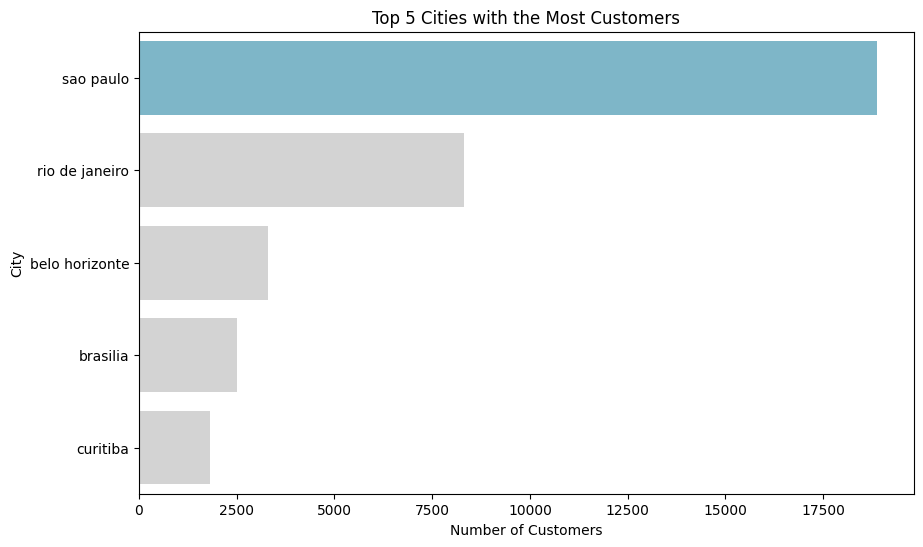

In [58]:
customer_city = all_df.customer_city.value_counts().sort_values(ascending=False).rename_axis('City').reset_index(name='Number of Customers') 

top_5_cities_customer = customer_city.head(5)
plt.figure(figsize=(10, 6))
colors = ["#72BCD4" if city == top_5_cities_customer['City'].iloc[0] else "#D3D3D3" for city in top_5_cities_customer['City']]
sns.barplot(x="Number of Customers", y="City", data=top_5_cities_customer, hue=top_5_cities_customer['City'], palette=colors, legend=False)
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.title('Top 5 Cities with the Most Customers')

plt.show()

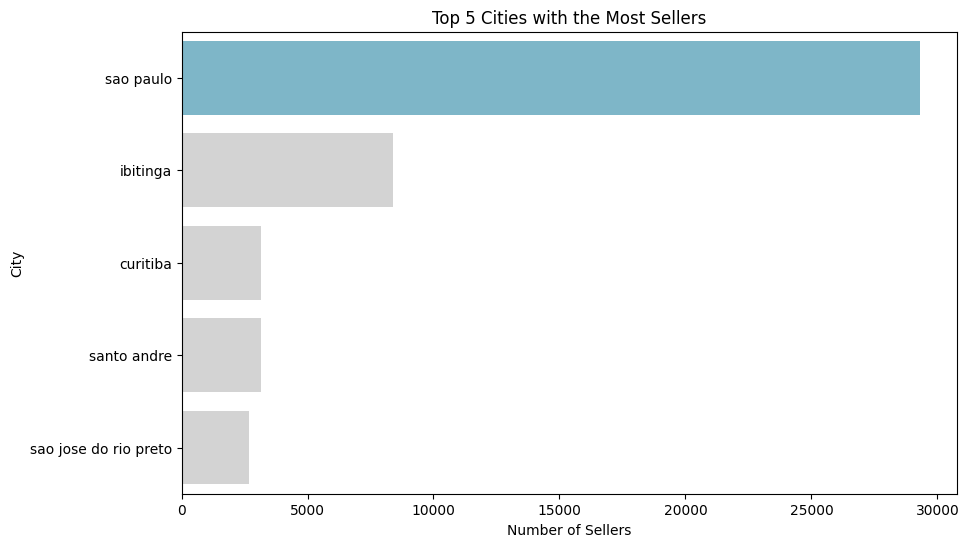

In [59]:
seller_city = all_df.seller_city.value_counts().sort_values(ascending=False).rename_axis('City').reset_index(name='Number of Sellers')
top_5_cities = seller_city.head(5)
plt.figure(figsize=(10, 6))
colors = ["#72BCD4" if city == top_5_cities['City'].iloc[0] else "#D3D3D3" for city in top_5_cities['City']]
sns.barplot(x="Number of Sellers", y="City", data=top_5_cities, hue=top_5_cities['City'], palette=colors, legend=False)
plt.xlabel('Number of Sellers')
plt.ylabel('City')
plt.title('Top 5 Cities with the Most Sellers')

plt.show()

### Pertanyaan 2: Bagaimana kepuasan customer terhadap layanan e-commerce ?

In [66]:
rating_service = all_df['review_score'].value_counts().sort_values(ascending=False)
max_score = rating_service.idxmax()

C:\Users\USER\AppData\Local\Temp\ipykernel_20760\3909188870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_rating.index,


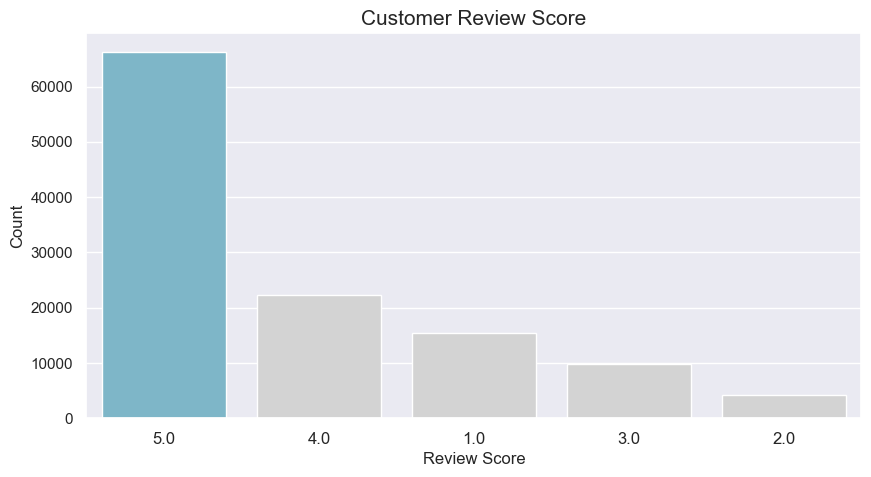

In [75]:
colors = ["#72BCD4"  if score == max_score else "#D3D3D3" for score in rating_service.index]

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=service_rating.index, 
            y=service_rating.values, 
            order=service_rating.index, 
            palette=colors, 
            legend=False)

plt.title("Customer Review Score", fontsize=15)
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

### Pertanyaan 3: Produk Kategori mana saja yang laku dan tidak laku di jual e-commerce  ?

C:\Users\USER\AppData\Local\Temp\ipykernel_9092\3443180521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_product.head(5), palette=colors, ax=ax[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_9092\3443180521.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="product_id", y="product_category_name_english", data=sorted_product.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])


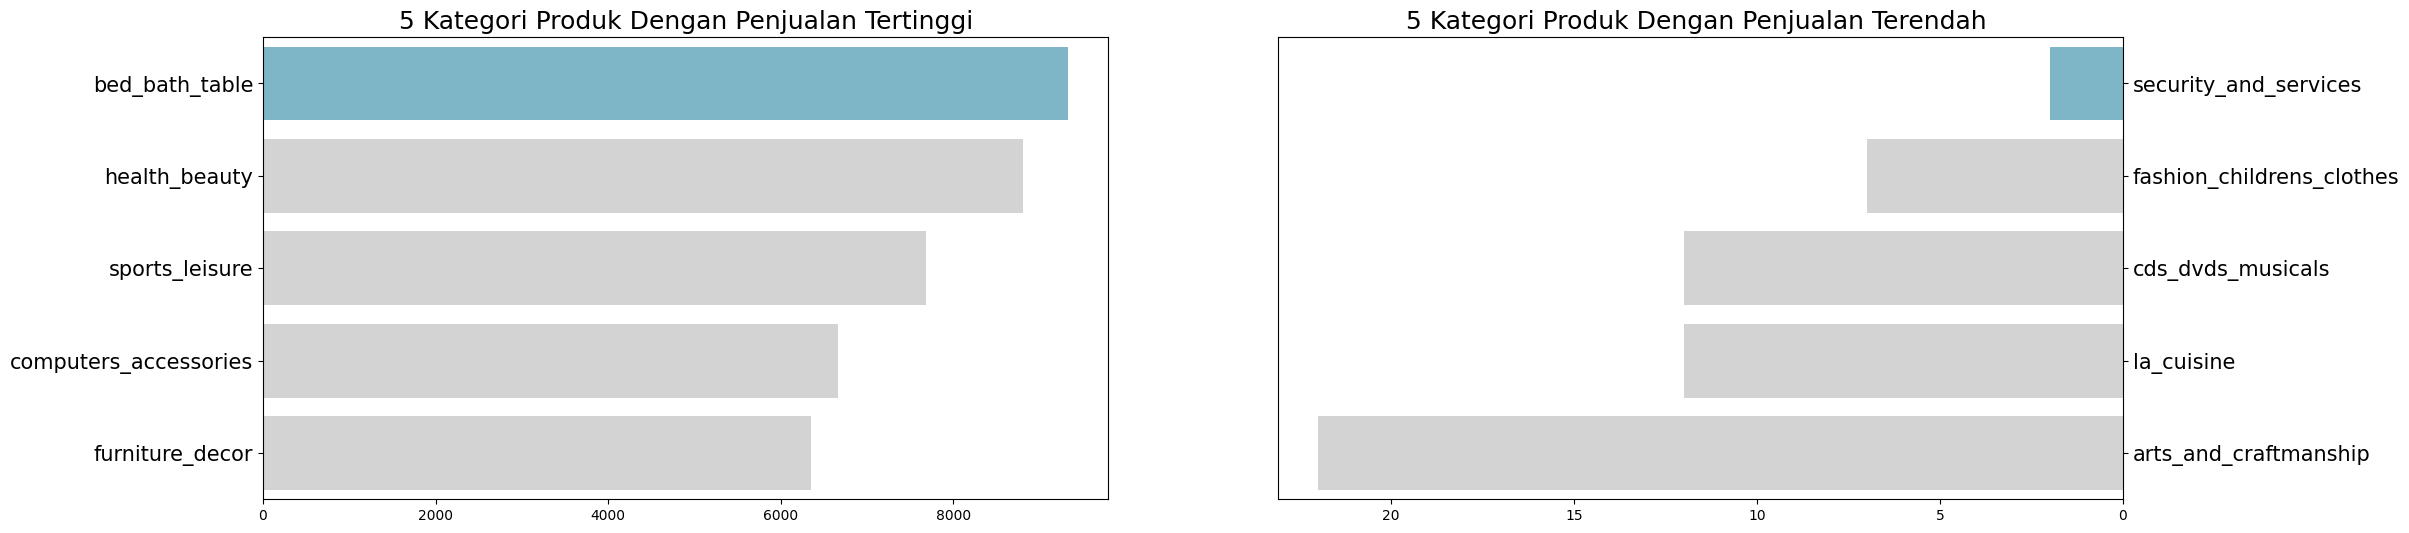

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_product.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("5 Kategori Produk Dengan Penjualan Tertinggi", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_product.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("5 Kategori Produk Dengan Penjualan Terendah ", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)
plt.show()

### pertanyaan 4 : Metode pembayaran mana yang digunakan untuk jumlah pembayaran terbesar? Berapa besarnya nilai pembayarannya?

C:\Users\USER\AppData\Local\Temp\ipykernel_20760\2609654018.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_type", y="payment_value_million", data=total_payment_type, palette="Blues_d")


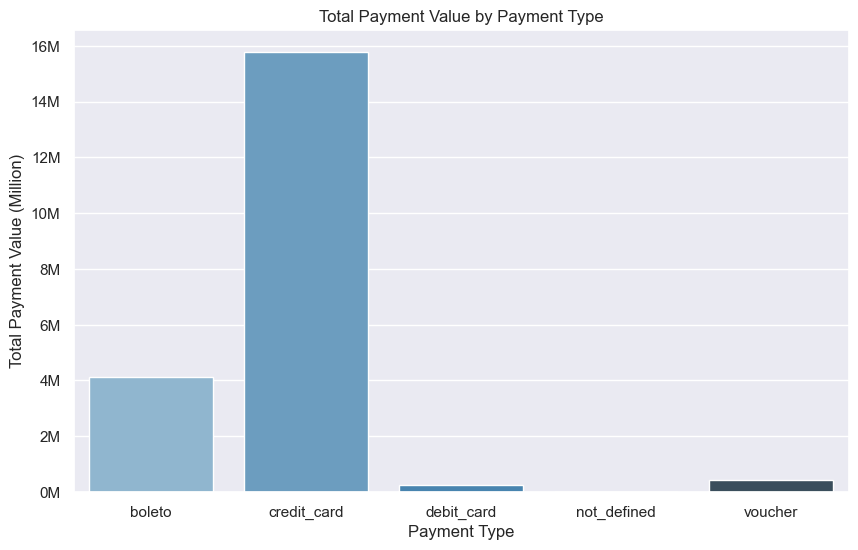

,payment_type,payment_value,payment_value_million
0,boleto,4110920.74,4.110921
1,credit_card,15775450.54,15.775451
2,debit_card,257374.89,0.257375
3,not_defined,0.00,0.000000
4,voucher,435917.84,0.435918


In [78]:
total_payment_type = all_df.groupby('payment_type')['payment_value'].sum().reset_index()
# Konversi nilai ke format "M" (juta)
total_payment_type['payment_value_million'] = total_payment_type['payment_value'] / 1e6
plt.figure(figsize=(10, 6))
sns.barplot(x="payment_type", y="payment_value_million", data=total_payment_type, palette="Blues_d")
plt.xlabel('Payment Type')
plt.ylabel('Total Payment Value (Million)')
plt.title('Total Payment Value by Payment Type')

# Menambahkan format label sumbu y
fmt = '{x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)
plt.show()
total_payment_type

## Analisis Lanjutan (Opsional)

### visualisasi RFM

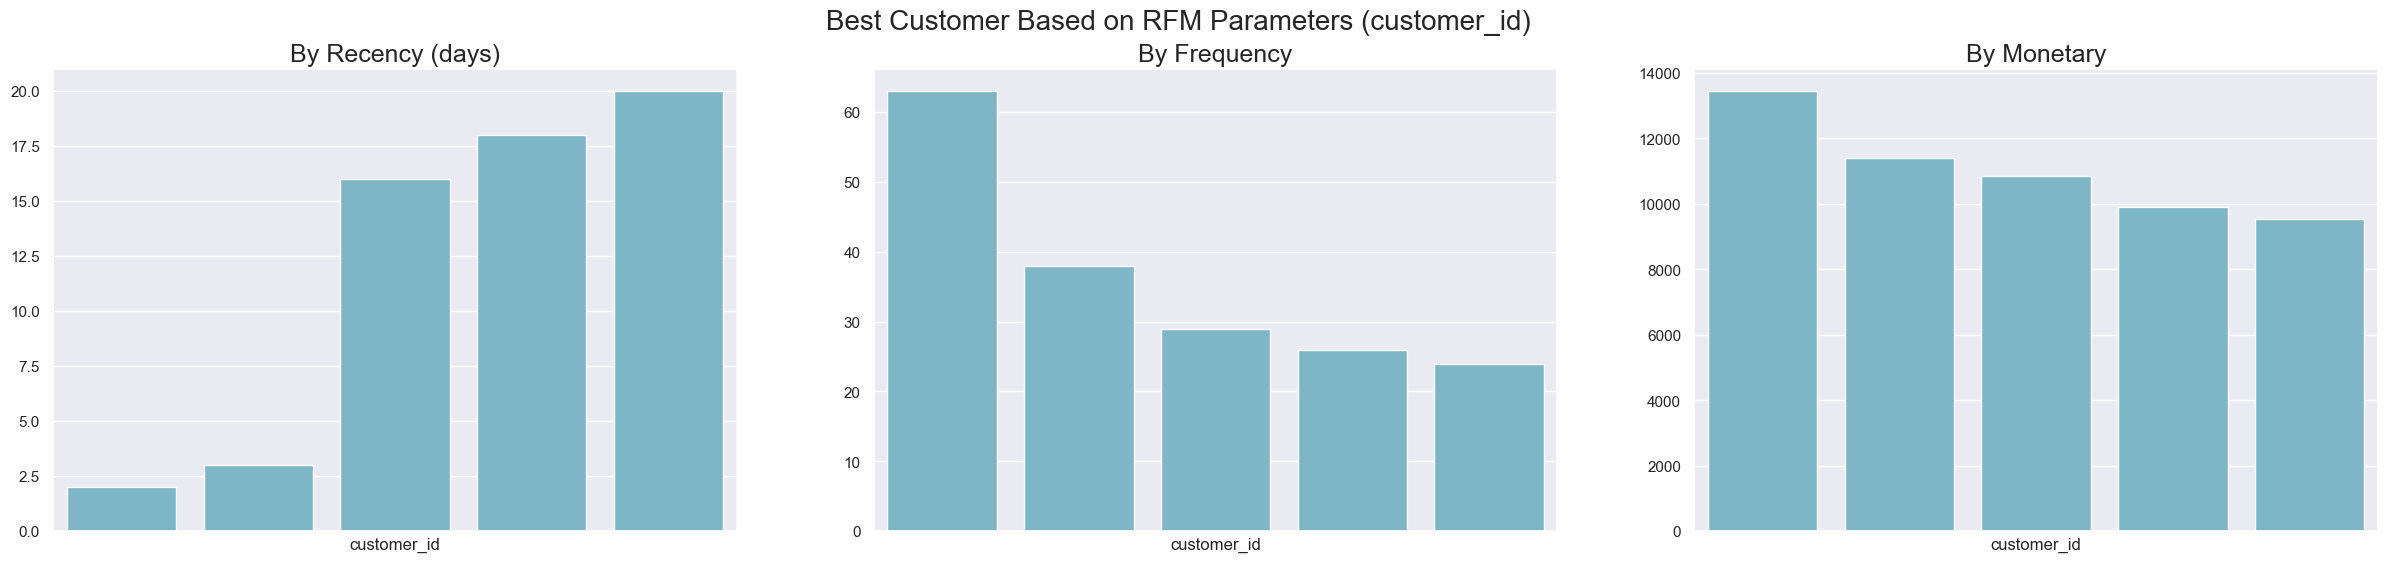

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Visualisasi berdasarkan Recency
sns.barplot(y="Recency", x="customer_id", data=rfm_df.sort_values(by="Recency", ascending=True).head(5), ax=ax[0], color=colors[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticks([])

# Visualisasi berdasarkan Frequency
sns.barplot(y="Frequency", x="customer_id", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5), ax=ax[1], color=colors[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticks([])

# Visualisasi berdasarkan Monetary
sns.barplot(y="Monetary", x="customer_id", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5), ax=ax[2], color=colors[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticks([])

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1 :Kota mana yang memiliki seller dan customer paling banyak?
  Jawaban : Berdasarkan diagram di atas dapat dikatakan bahwa mayoritas pelanggan dan penjualan dari Sao paulo
- Conclution pertanyaan 2 : Bagiamana kepuasan customer terhadap layanan e-commerce ?
  Jawaban : Berdasarkan diagram di atas dapat disimpulkan bahwa mayoritas customer merasa puas atas service yang diberikan. Hal ini terbukti dengan jumlah review_score bernilai 5.0 memiliki jumlah terbanyak
- Conclution Pertanyaan 3: Produk Kategori mana saja yang laku dan tidak laku di jual e-commerce  ?
  Jawaban : Berdasarkan diagram di atas product bed_bath_table merupakan barang yang memiliki jumlah penjualan terbanyak, sedangkan product security_and_service merupakan kategori yang paling sedikit penjualannya
- Conclution pertanyaan 4 : Metode pembayaran mana yang digunakan untuk jumlah pembayaran terbesar? Berapa besarnya nilai pembayarannya? metode pembayaran yang paling banyak digunakan untuk jumlah pembayaran terbesar adalah melalui metode pembayaran dengan kartu kredit mengikuti dengan total nilai pembayaran sebesar 15.775.450,54 di ikutielalui boleto, dengan total nilai pembayaran mencapai 4.110.920,74